# First-Order InfoMap Communities, PageRank and Flow
Plotting first-order communities found by InfoMap, with node sizes corresponding to flow and colors corresponding to PageRank. Also includes data from Alaska and Hawaii, a late addition to the plotting scripts.

In [1]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
import signac
from util import fetch_geodata

project = signac.get_project()
job = project.find_jobs({"year": 2011, "quarter": 1}).next()

In [2]:
paths = pd.read_csv(job.fn('first_order_infomap.tree'), sep=' ', header=None, skiprows=2, names=['path', 'flow', 'ID', 'node'])
paths['path'] = paths['path'].apply(lambda x: tuple(map(int, x.split(':'))))
paths = paths.sort_values('path')
iatas = pd.read_csv(job.fn('airport_codes.csv'))
iatas['ID'] = pd.to_numeric(iatas['ID'])
iatas = iatas.set_index('ID')
airports = pd.merge(iatas, fetch_geodata(continental_only=False), left_on='IATA', right_index=True)
paths = pd.merge(paths, airports, left_on='ID', right_index=True)
pageranks = pd.read_csv(job.fn('first_order_pagerank.txt'), header=None, names=['ID', 'PageRank'])
paths = pd.merge(paths, pageranks, left_on='ID', right_on='ID')
paths = paths.sort_values('path')
paths

Reading airport geodata...


,path,flow,ID,node,IATA,name,lon,lat,PageRank
0,"(1, 1, 1)",6.592530e-02,10397,29,ATL,Hartsfield Jackson Atlanta International Airport,-84.428101,33.636700,0.054991
1,"(1, 1, 2)",4.533480e-02,13930,318,ORD,Chicago O'Hare International Airport,-87.904800,41.978600,0.039411
2,"(1, 1, 3)",4.367130e-02,11292,115,DEN,Denver International Airport,-104.672997,39.861698,0.045268
3,"(1, 1, 4)",4.258200e-02,11298,116,DFW,Dallas Fort Worth International Airport,-97.038002,32.896801,0.037626
4,"(1, 1, 5)",4.035980e-02,11057,91,CLT,Charlotte Douglas International Airport,-80.943100,35.214001,0.032841
5,"(1, 1, 6)",3.169800e-02,14107,332,PHX,Phoenix Sky Harbor International Airport,-112.012001,33.434299,0.026117
6,"(1, 1, 7)",2.836330e-02,12892,239,LAX,Los Angeles International Airport,-118.407997,33.942501,0.023972
7,"(1, 1, 8)",2.545450e-02,12266,204,IAH,George Bush Intercontinental Houston Airport,-95.341400,29.984400,0.021945
8,"(1, 1, 9)",2.453330e-02,13487,302,MSP,Minneapolis-St Paul International/Wold-Chamber...,-93.221802,44.882000,0.026207
9,"(1, 1, 10)",2.397230e-02,11433,124,DTW,Detroit Metropolitan Wayne County Airport,-83.353401,42.212399,0.021508


In [3]:
def plot_community(paths, community=None, limits=[-128, -64, 22, 49]):
    print('Generating plot...')
    fig = plt.figure(figsize=(6, 4), dpi=400)
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent(limits, ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    plt.title('Communit{} from First-Order Network ({}Q{})'.format(
        'ies' if community is None else 'y ' + str(community),
        job.sp.year, job.sp.quarter))

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.8594)
        return {'facecolor': facecolor, 'edgecolor': 'grey'}

    def inset_hawaii():
        sub_ax = fig.add_axes((0.17, 0.10, 0.15, 0.15), projection=ccrs.LambertConformal())
        map_extent = (-159, -155, 17, 23.5)
        sub_ax.set_extent(map_extent, ccrs.Geodetic())  # map extents
        sub_ax.add_geometries(
            shpreader.Reader(states_shp).geometries(),
            ccrs.PlateCarree(),
            styler=colorize_state)
        sub_ax.set_title('Hawaii')
        extent_box = sgeom.box(map_extent[0], map_extent[2], map_extent[1], map_extent[3])
        sub_ax.add_geometries([extent_box], ccrs.PlateCarree(), color='none', linewidth=0.05)
        return sub_ax
    
    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    xs = paths.lon.values
    ys = paths.lat.values
    colors = paths.PageRank.values
    sizes = 10000*paths.flow.values
    

    if community == (1, 1):
        sub_ax = inset_hawaii()
    
    for ax in reversed(fig.axes):
        dots = ax.scatter(xs, ys, transform=ccrs.PlateCarree(), c=colors, s=sizes, alpha=0.8, zorder=10,
                          norm=mcolors.LogNorm(vmin=1e-4, vmax=1e-1), cmap='viridis')

    top_n = paths.sort_values('flow', ascending=False).head(20).index
    for row in paths.loc[top_n].itertuples():
        ax.annotate(row.IATA, (row.lon, row.lat), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                    fontsize=40*row.flow**0.2, zorder=11, ha='center', va='center')
    cbax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    cbar = plt.colorbar(dots, cax=cbax)
    cbar.set_label('PageRank', rotation=90)
    plt.show()
    plt.close()

In [4]:
def get_community(paths, community_path):
    if len(community_path) == 3:
        left = tuple([*community_path[:-1], community_path[-1]-1])
        right = tuple([*community_path[:-1], community_path[-1]+1])
    else:
        left = tuple([*community_path, *(-1,)*(3-len(community_path))])
        right = tuple([*community_path[:-1], community_path[-1]+1, *(0,)*(3-len(community_path))])
    return paths[paths.path.between(left, right)]

(1, 1) 0.9968992053220003
Generating plot...


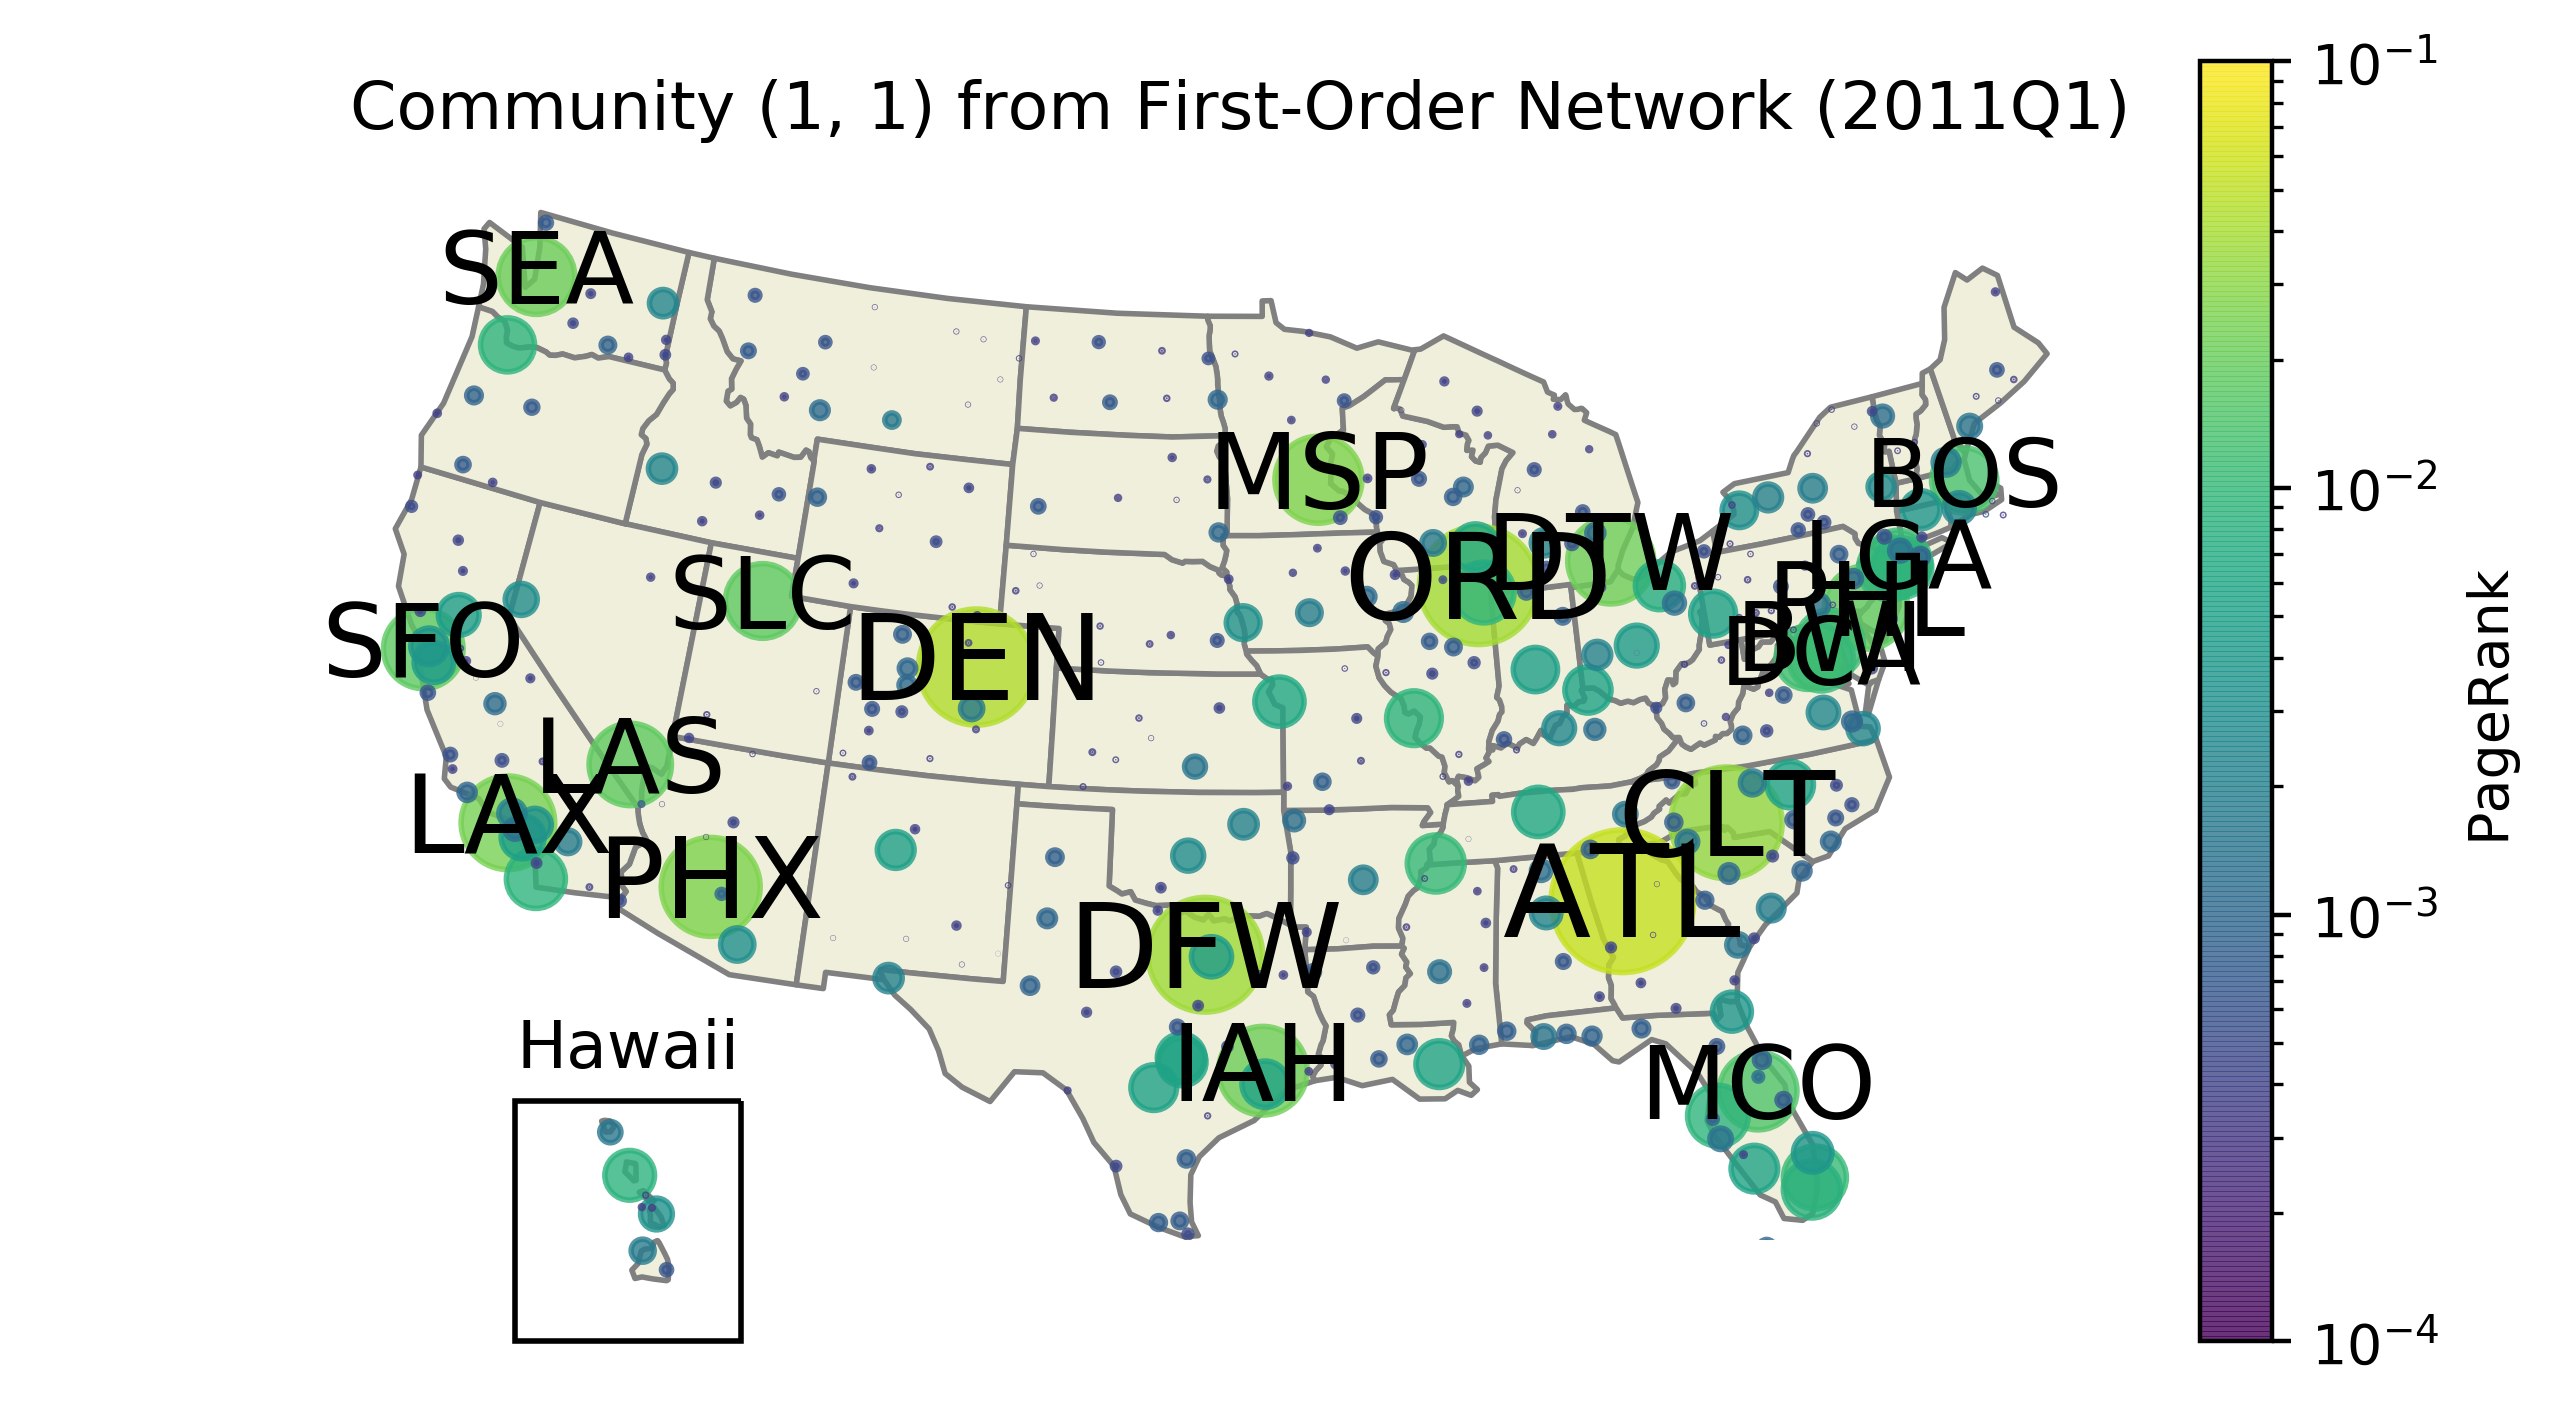

(1, 2) 0.0033134577259999985
Generating plot...


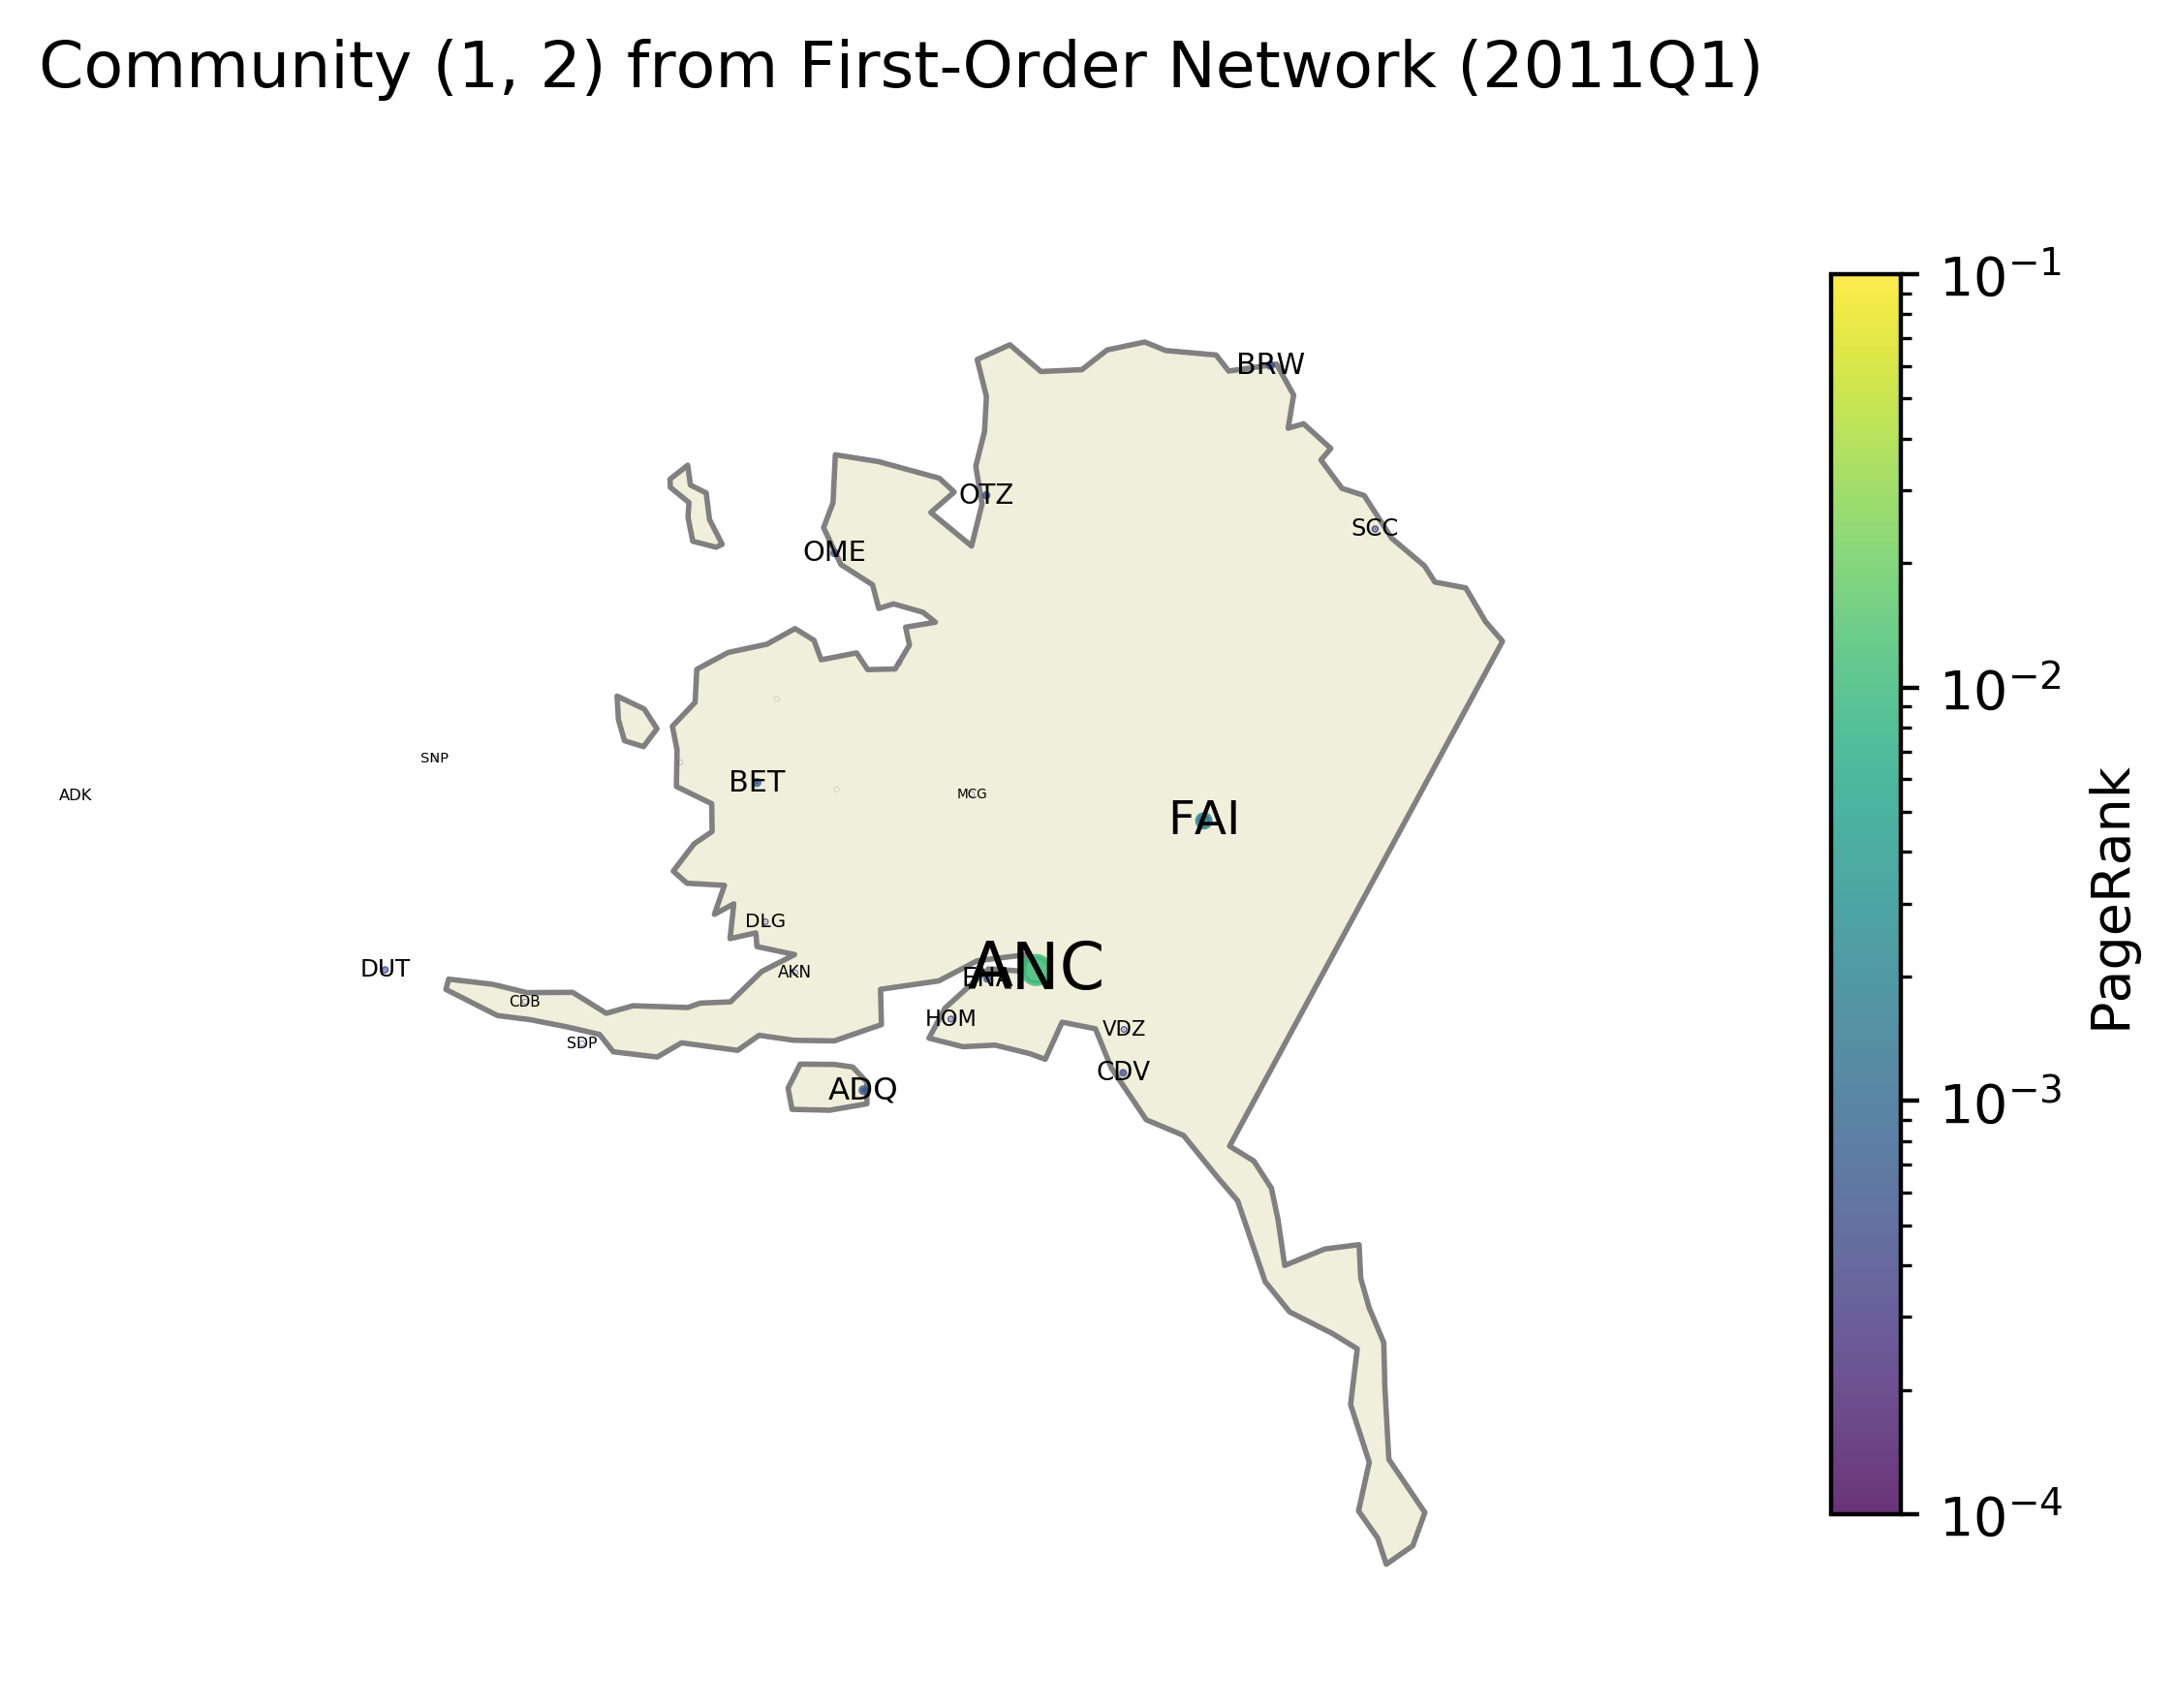

(2,) 0.0006238285
Generating plot...


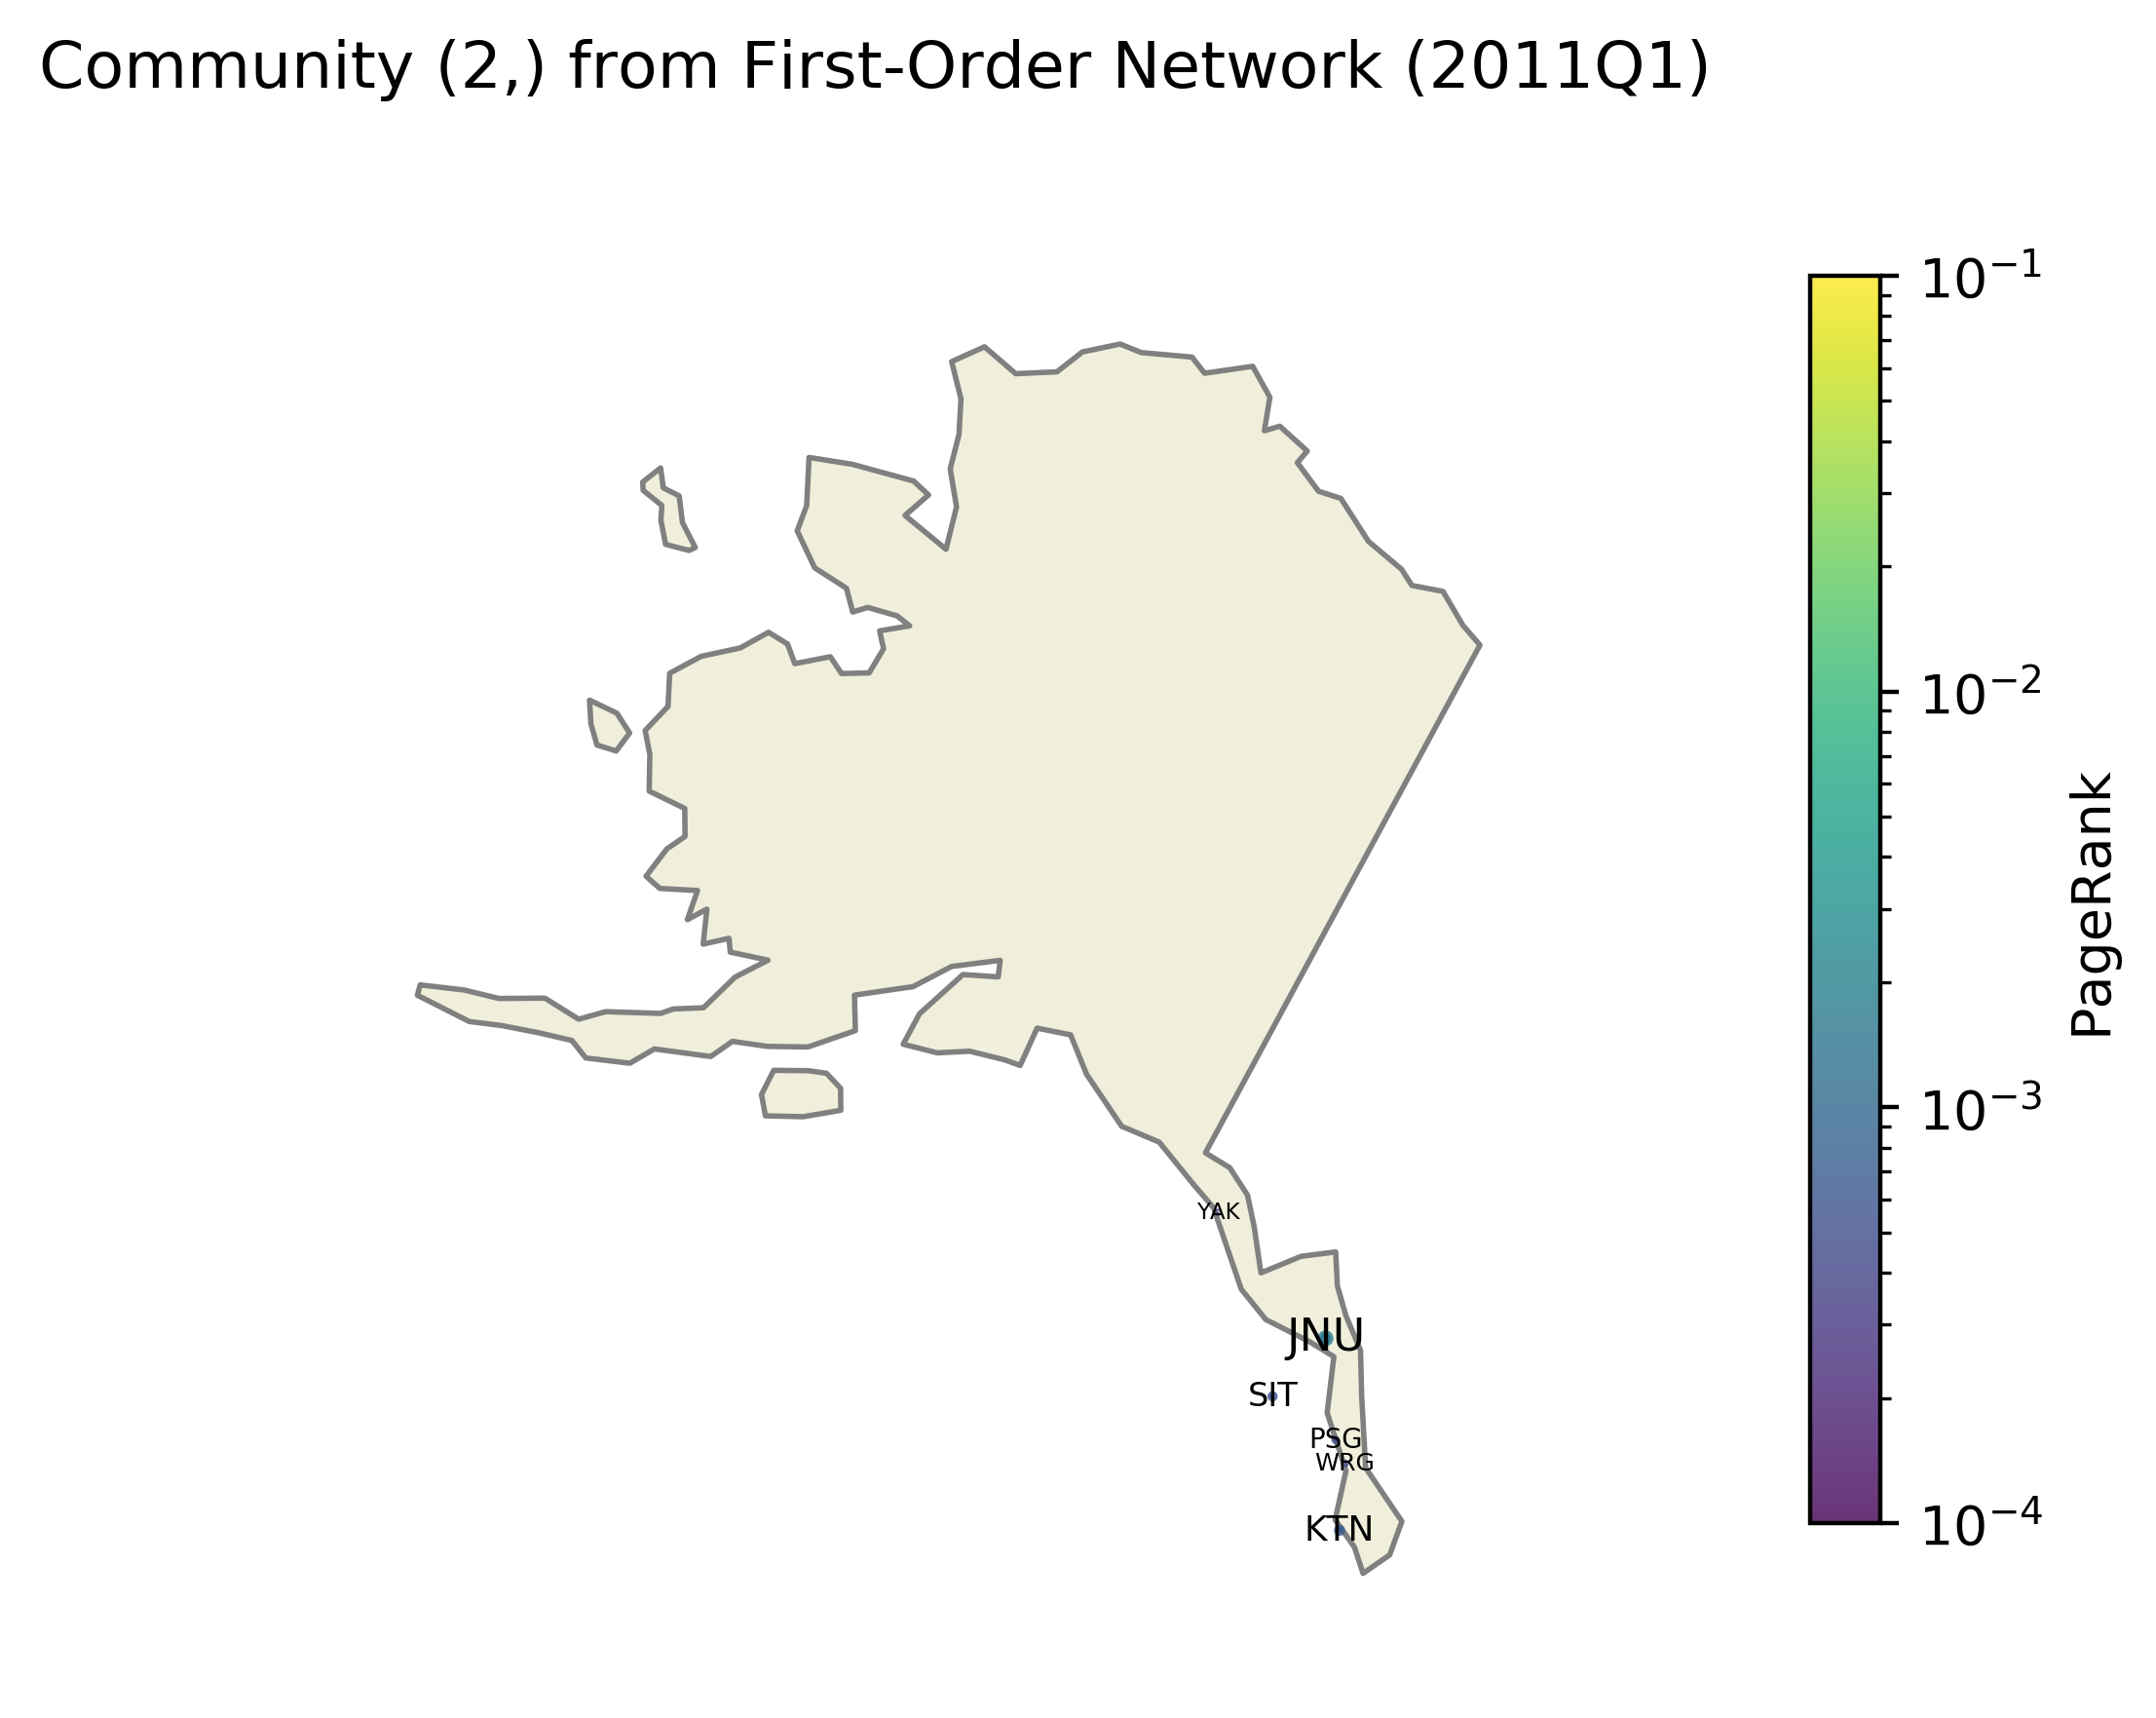

In [5]:
communities = [(1, 1), (1, 2), (2,)]
community_limits = [(-128, -64, 22, 49), (-171.5, -137, 51, 72), (-171.5, -137, 51, 72)]
for community, limits in zip(communities, community_limits):
    data = get_community(paths, community)
    flow = sum(data.flow)
    print('{} {}'.format(community, flow))
    plot_community(data, community=community, limits=limits)

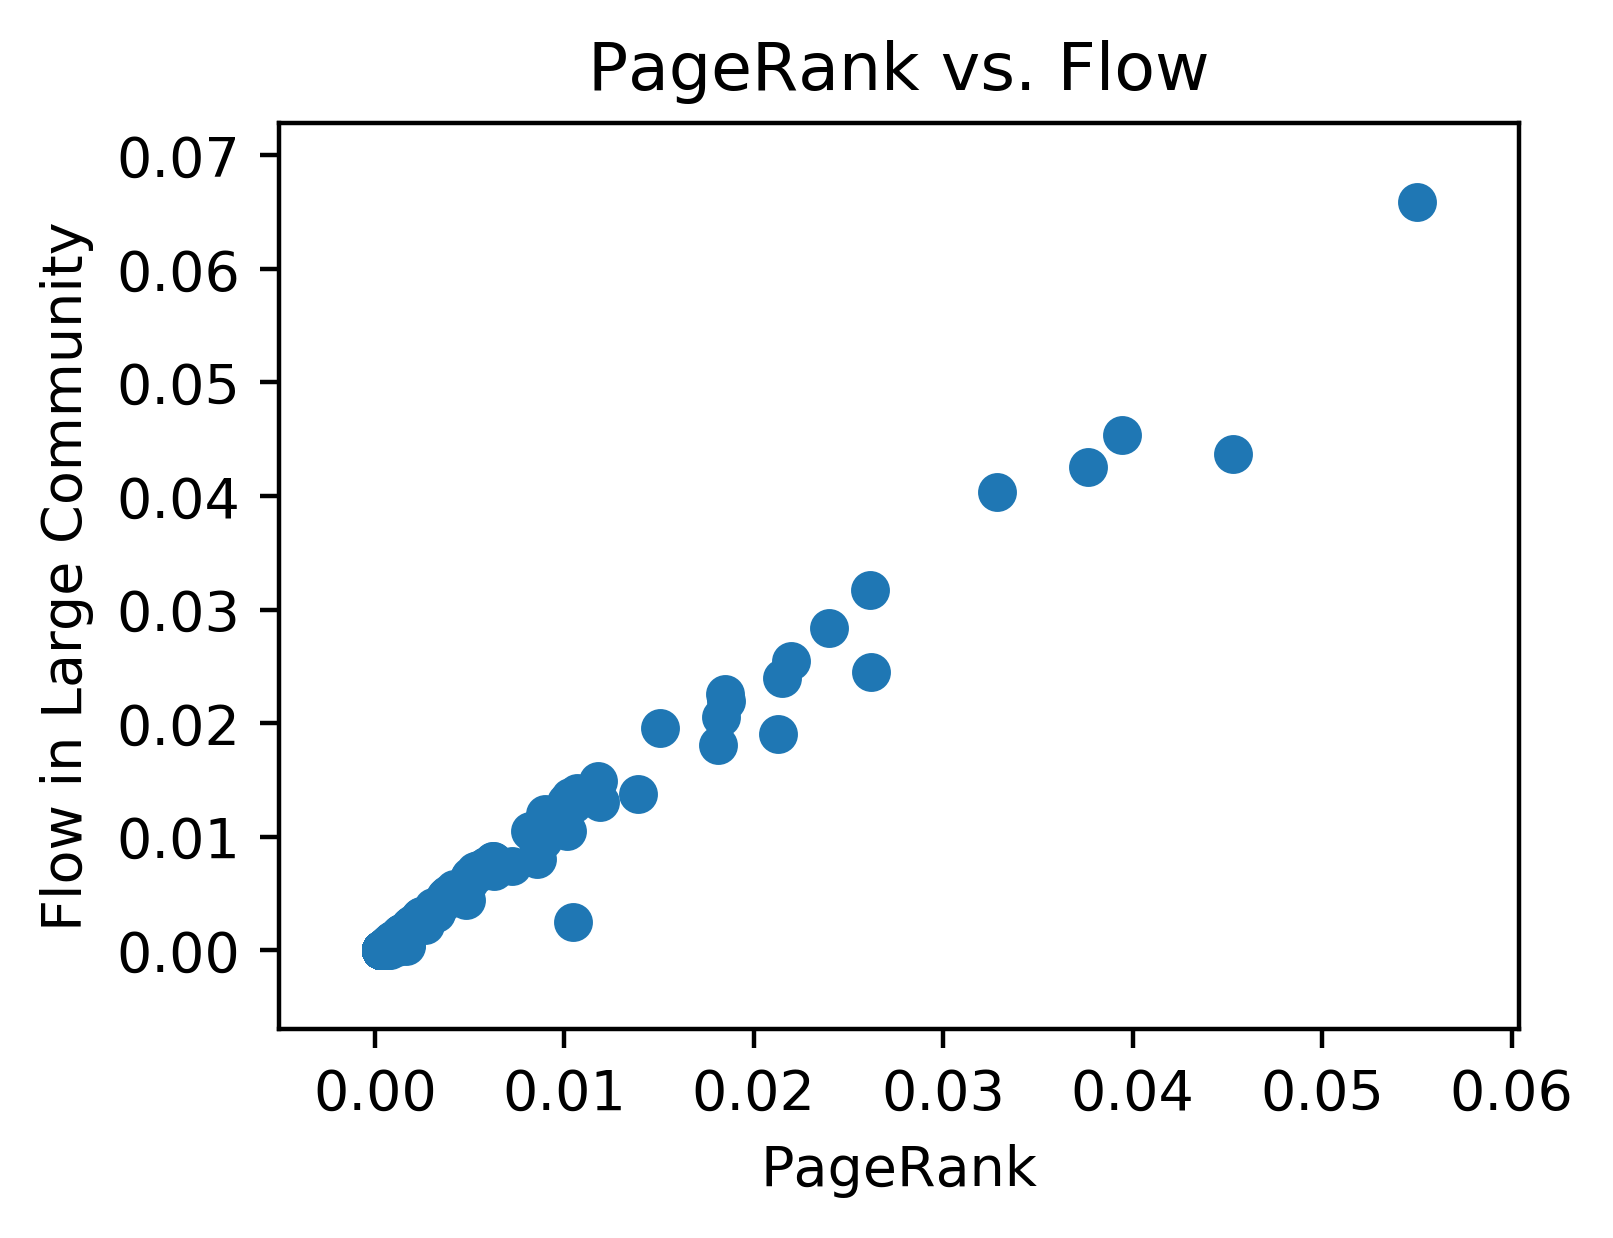

In [6]:
plt.figure(figsize=(4, 3), dpi=400)
plt.scatter(paths.PageRank, paths.flow)
plt.xlabel('PageRank')
plt.ylabel('Flow in Large Community')
plt.title('PageRank vs. Flow')
plt.show()

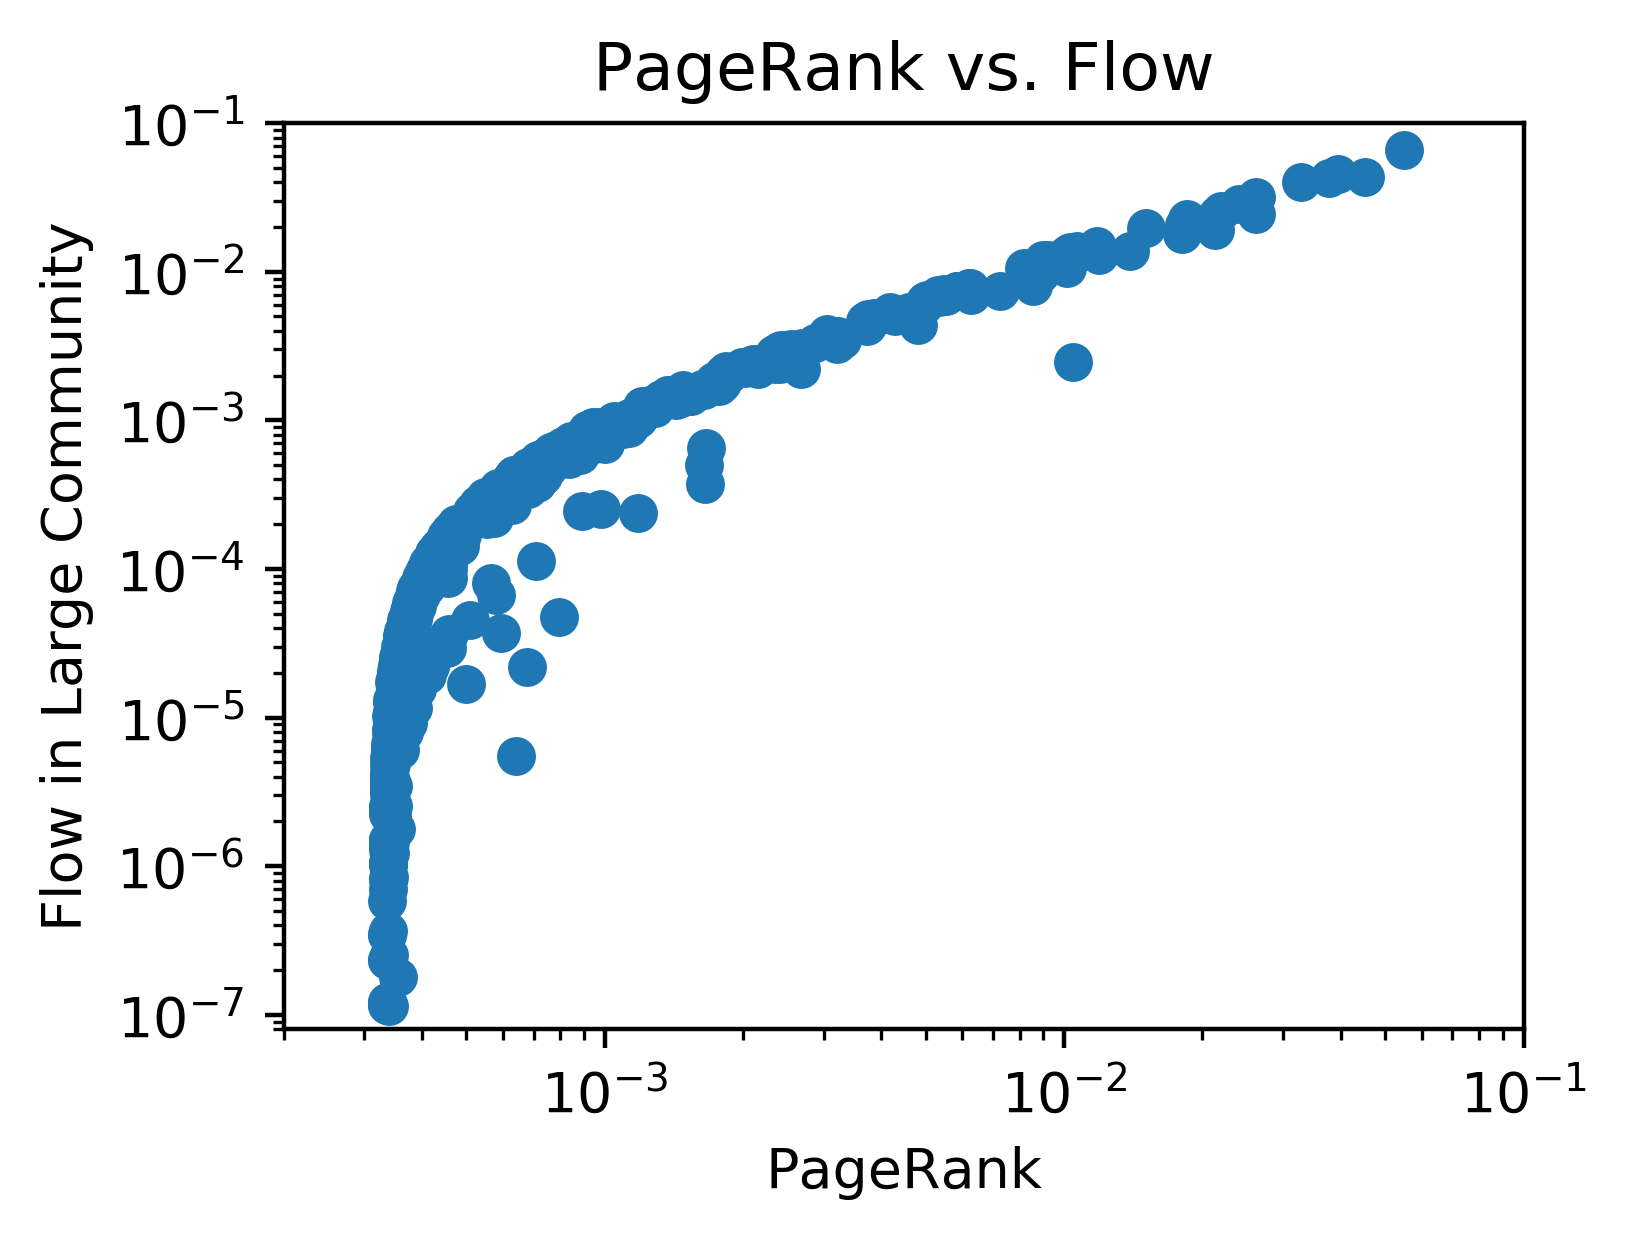

In [7]:
plt.figure(figsize=(4, 3), dpi=400)
plt.scatter(paths.PageRank, paths.flow)
plt.xlabel('PageRank')
plt.ylabel('Flow in Large Community')
plt.title('PageRank vs. Flow')
plt.xscale('log')
plt.yscale('log')
plt.xlim([2e-4, 0.1])
plt.ylim([8e-8, 0.1])
plt.show()